# 라이브러리 로드

In [83]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.font_manager as fm
fm.findSystemFonts()  # 한글 폰트 설치용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,444 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 157604 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import plot_importance # 중요변수 시각화
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix,
                            precision_score, recall_score,
                            f1_score,
                            roc_curve, roc_auc_score)

# 데이터 불러오기

In [2]:
data = pd.read_excel('./trans_data.xlsx')
data

,성별,나이대,총 결제 금액,총 결제 건수,건당 평균 결제가격,건당 최대 결제 가격,건당 최소 결제 가격
0,여,20대,708000,32,21040,18000,3000
1,남,40대,2135000,49,42650,123000,15000
2,여,20대,410000,18,18500,34000,1000
3,여,30대,1240000,31,31600,113000,9000
4,남,30대,3540000,36,37800,132000,23000
5,남,20대,425400,27,15400,24500,5600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   성별           6 non-null      object
 1   나이대          6 non-null      object
 2   총 결제 금액      6 non-null      int64 
 3   총 결제 건수      6 non-null      int64 
 4   건당 평균 결제가격   6 non-null      int64 
 5   건당 최대 결제 가격  6 non-null      int64 
 6   건당 최소 결제 가격  6 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 464.0+ bytes


# 전처리

## 결측치 파악

In [4]:
data.isna().sum()

성별             0
나이대            0
총 결제 금액        0
총 결제 건수        0
건당 평균 결제가격     0
건당 최대 결제 가격    0
건당 최소 결제 가격    0
dtype: int64

# 데이터 정제

In [5]:
# 성별 처리
lb = LabelEncoder()
lb.fit(data['성별'])

print(lb.classes_)
data['성별'] = lb.transform(data['성별'])
data

['남' '여']


,성별,나이대,총 결제 금액,총 결제 건수,건당 평균 결제가격,건당 최대 결제 가격,건당 최소 결제 가격
0,1,20대,708000,32,21040,18000,3000
1,0,40대,2135000,49,42650,123000,15000
2,1,20대,410000,18,18500,34000,1000
3,1,30대,1240000,31,31600,113000,9000
4,0,30대,3540000,36,37800,132000,23000
5,0,20대,425400,27,15400,24500,5600


In [6]:
# 나이대 처리
data['나이대'] = data['나이대'].str[:-1]
data['나이대'].astype('uint8')
data

,성별,나이대,총 결제 금액,총 결제 건수,건당 평균 결제가격,건당 최대 결제 가격,건당 최소 결제 가격
0,1,20,708000,32,21040,18000,3000
1,0,40,2135000,49,42650,123000,15000
2,1,20,410000,18,18500,34000,1000
3,1,30,1240000,31,31600,113000,9000
4,0,30,3540000,36,37800,132000,23000
5,0,20,425400,27,15400,24500,5600


In [7]:
# 임시 복제
data = pd.concat([data] * 10, ignore_index = True)
data.head()

,성별,나이대,총 결제 금액,총 결제 건수,건당 평균 결제가격,건당 최대 결제 가격,건당 최소 결제 가격
0,1,20,708000,32,21040,18000,3000
1,0,40,2135000,49,42650,123000,15000
2,1,20,410000,18,18500,34000,1000
3,1,30,1240000,31,31600,113000,9000
4,0,30,3540000,36,37800,132000,23000


In [8]:
data['카테고리'] = y = ['카페', '관광지', '카페', '한식', '중식', '한식'] * 10
data.head()

,성별,나이대,총 결제 금액,총 결제 건수,건당 평균 결제가격,건당 최대 결제 가격,건당 최소 결제 가격,카테고리
0,1,20,708000,32,21040,18000,3000,카페
1,0,40,2135000,49,42650,123000,15000,관광지
2,1,20,410000,18,18500,34000,1000,카페
3,1,30,1240000,31,31600,113000,9000,한식
4,0,30,3540000,36,37800,132000,23000,중식


## EDA

In [9]:
plt.rc('font', family='NanumBarunGothic')

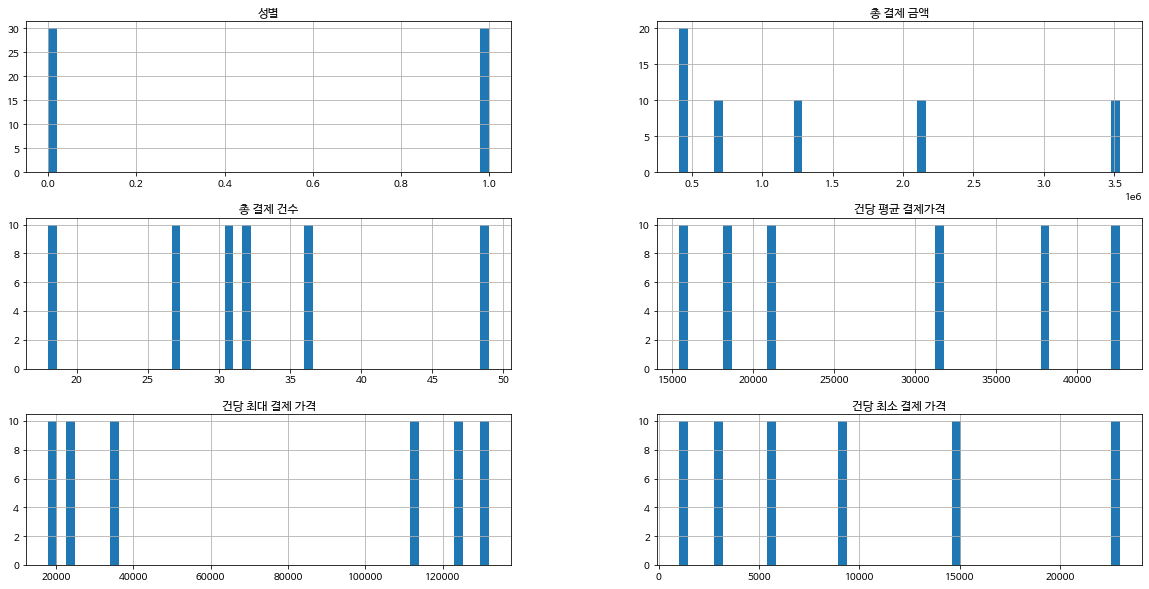

In [10]:
data.hist(bins = 50, figsize = (20, 10));

<Figure size 576x576 with 0 Axes>

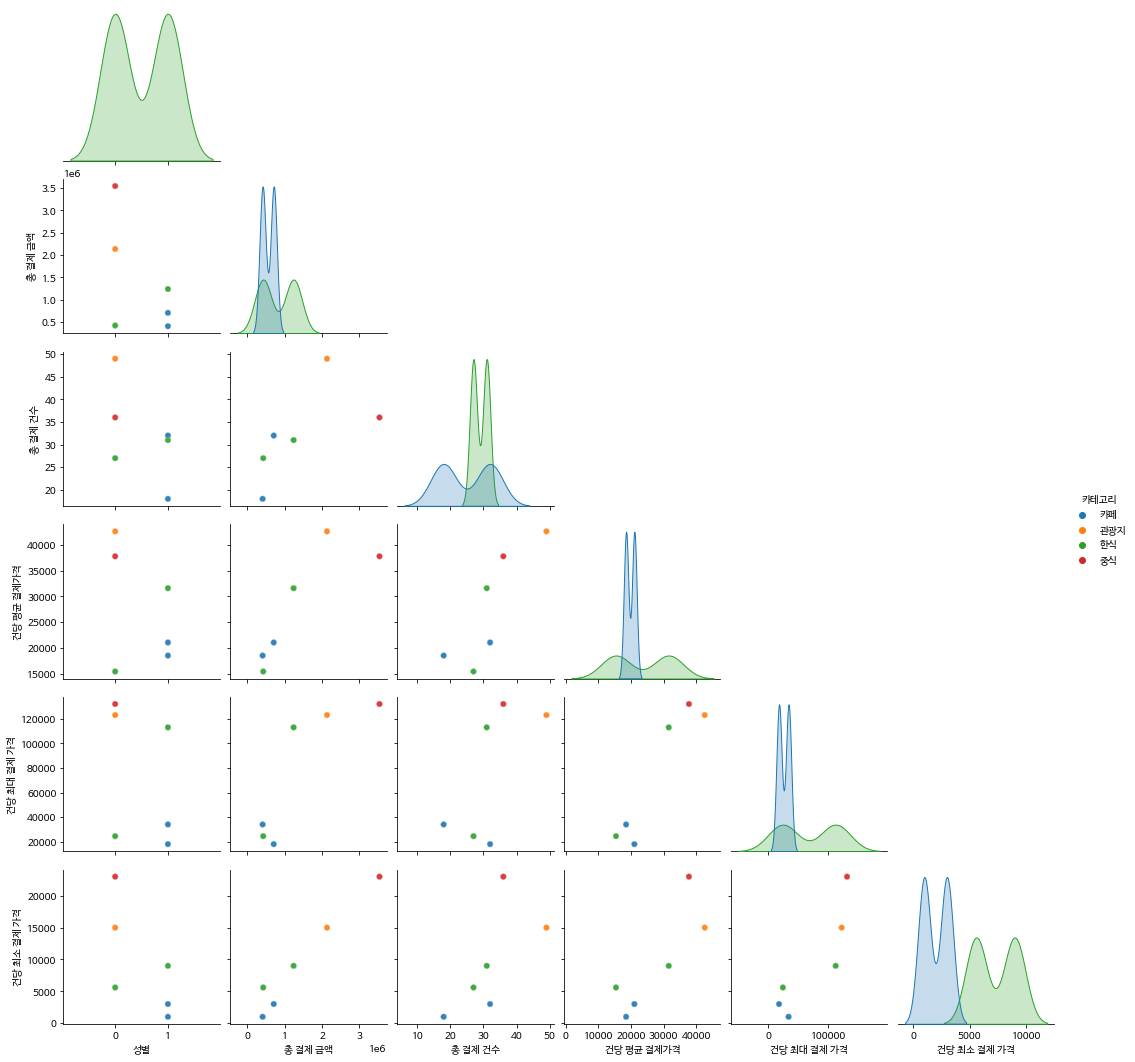

In [11]:
plt.figure(figsize=(8, 8))
sns.pairplot(data, hue='카테고리', corner=True, plot_kws={'alpha': 0.2})
plt.show()

In [12]:
# sample y
y = ['카페', '관광지', '카페', '한식', '중식', '한식'] * 10

lb = LabelEncoder()
lb.fit(y)
print(lb.classes_)

data['카테고리'] = lb.transform(y)
data.head()

['관광지' '중식' '카페' '한식']


,성별,나이대,총 결제 금액,총 결제 건수,건당 평균 결제가격,건당 최대 결제 가격,건당 최소 결제 가격,카테고리
0,1,20,708000,32,21040,18000,3000,2
1,0,40,2135000,49,42650,123000,15000,0
2,1,20,410000,18,18500,34000,1000,2
3,1,30,1240000,31,31600,113000,9000,3
4,0,30,3540000,36,37800,132000,23000,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


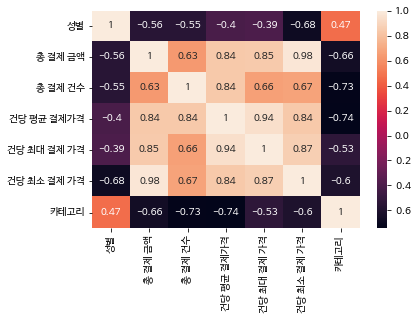

In [13]:
sns.heatmap(data.corr(), annot=True)
plt.show()

## 스케일링

In [10]:
# Tree계열 쓴다면 생략.

## 분할

In [14]:
data.drop(['카테고리'], inplace=True, axis=1)

In [18]:
y = lb.transform(y)
print(y)

[2 0 2 3 1 3 2 0 2 3 1 3 2 0 2 3 1 3 2 0 2 3 1 3 2 0 2 3 1 3 2 0 2 3 1 3 2
 0 2 3 1 3 2 0 2 3 1 3 2 0 2 3 1 3 2 0 2 3 1 3]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45, 7) (45,)
(15, 7) (15,)


# 모델 학습

In [20]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
cross_val = cross_validate(estimator=decision_tree_model, X=X_train, y=y_train, cv=5)

print(f"average test score : {cross_val['test_score'].mean()}")

average test score : 1.0


In [21]:
rf_model = RandomForestClassifier()
cross_val = cross_validate(estimator=rf_model, X=X_train, y=y_train, cv=5)
print(f"average test score :", cross_val['test_score'].mean())

average test score : 1.0


In [22]:
et_model = ExtraTreesClassifier()
cross_val = cross_validate(estimator=et_model, X=X_train, y=y_train, cv=5)
print(f"average test score :", cross_val['test_score'].mean())

average test score : 1.0


In [17]:
xgb_model = XGBClassifier()
cross_val = cross_validate(estimator=xgb_model, X=X_train, y=y_train, cv=5)
print(f"average test score :", cross_val['test_score'].mean())

average test score : nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 726, in fit
    missing=self.missing, nthread=self.n_jobs)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 380, in __init__
    feature_types)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 239, in _mayb

In [23]:
# 최종 모델 학습

decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train), decision_tree_model.score(X_test, y_test)

(1.0, 1.0)

In [24]:
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test)

(1.0, 1.0)

In [25]:
et_model.fit(X_train, y_train)
et_model.score(X_train, y_train), et_model.score(X_test, y_test)

(1.0, 1.0)

In [ ]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train), xgb_model.score(X_test, y_test)

# 해석

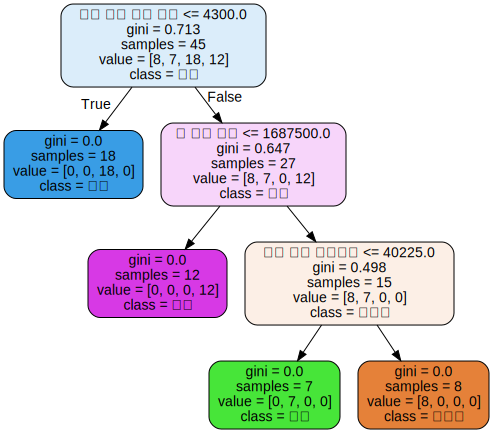

In [26]:
dot_data = export_graphviz(decision_tree=decision_tree_model,
                           feature_names=data.columns,
                           filled=True,
                           rounded=True,
                           class_names=lb.classes_
                           )
graph = graphviz.Source(dot_data)
graph

In [27]:
from sklearn.tree import export_text
r = export_text(decision_tree=decision_tree_model, feature_names=list(data.columns))
print(r)

|--- 건당 최소 결제 가격 <= 4300.00
|   |--- class: 2
|--- 건당 최소 결제 가격 >  4300.00
|   |--- 총 결제 금액 <= 1687500.00
|   |   |--- class: 3
|   |--- 총 결제 금액 >  1687500.00
|   |   |--- 건당 평균 결제가격 <= 40225.00
|   |   |   |--- class: 1
|   |   |--- 건당 평균 결제가격 >  40225.00
|   |   |   |--- class: 0



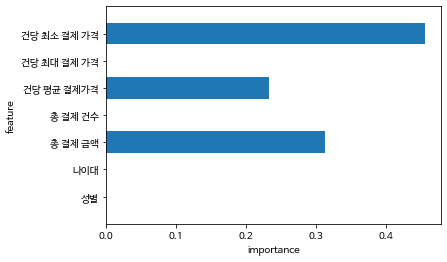

In [28]:
def plot_feature_importances_cancer(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(decision_tree_model)

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(xgb_model)

In [38]:
# 랜덤 포레스트 모델 기준 평가...
y_pred = rf_model.predict(X_test)

# 1. 정확도
print(f"정확도 : {accuracy_score(y_test, y_pred)}")

# 2. 오차 행렬
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred) 
print(f"오차행렬 :\n{conf_matrix}")  ##  TN FP / FN TP

# 3. 정밀도와 재현율
print(f"정밀도 micro : {precision_score(y_test, y_pred, average='micro')}")
print(f"재현율 micro : {recall_score(y_test, y_pred, average='micro')}")

print(f"정밀도 macro : {precision_score(y_test, y_pred, average='macro')}")
print(f"재현율 macro : {recall_score(y_test, y_pred, average='macro')}")

# 4. F1-score
print(f"F1-score micro : {f1_score(y_test, y_pred, average='micro')}")
print(f"F1-score macro : {f1_score(y_test, y_pred, average='macro')}")

정확도 : 1.0
오차행렬 :
[[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 8]]
정밀도 micro : 1.0
재현율 micro : 1.0
정밀도 macro : 1.0
재현율 macro : 1.0
F1-score micro : 1.0
F1-score macro : 1.0


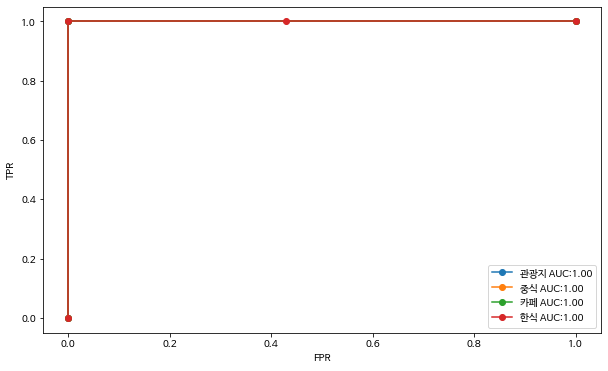

In [49]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
y_proba = rf_model.predict_proba(X_test)

plt.xlabel('FPR'); plt.ylabel('TPR')
for i, target_name in enumerate(lb.classes_):
  fpr, tpr, thresh = roc_curve(y_test, y_proba[:, i], pos_label=i)

  score = auc(fpr, tpr)
  plt.plot(fpr, tpr, marker='o', label=f'{target_name} AUC:{score:.2f}')
_ = plt.legend()

# 모델 저장

In [27]:
estimator = et_model

In [28]:
import pickle

with open('mbti_model.dat', 'wb') as f:  # dat는 그냥 의미없음.   # write binary mode
  pickle.dump(estimator, f)  # 저장하기

In [29]:
with open('mbti_model.dat', 'rb') as f:
  model = pickle.load(f)  # 로드

model.score(X_test, y_test)

1.0